<a href="https://colab.research.google.com/github/edusgr/EDP-II/blob/main/M%C3%89TODO_DE_COLOCACI%C3%93N.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Método de Colocación

Consideramos el siguiente problema
$$ u''+u=x $$
Sujeto a las condiciones
$$ u(0)=0 \hspace0.5cm , \hspace0.5cm u'(0)=2  $$


Hay que encontrar la solución aproximada de la forma
$$ u_N = \alpha_0 + \alpha_1x + \alpha_2 x^2 + \alpha_3 x^3 +...$$

$\textbf{a)}$ Encontrar  $\alpha_0 \hspace0.2cm \& \hspace0.2cm \alpha_1 $ para que cumplan las condiciones

$\textbf{b)} $ Encuentre el error $\epsilon =u''_N +u_N-x$

Se restringe $u_N$ como una función cúbica, tome $x=\frac{1}{2}$ y $x=1$ como puntos de colocación para su aproximación

In [74]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [75]:
x = sp.symbols('x') # introducir variable
u = sp.Function('u') # una funcion

In [76]:
ode = u(x).diff(x, x) + u(x) - x
sp.dsolve(ode, u(x))

Eq(u(x), C1*sin(x) + C2*cos(x) + x)

In [77]:
sol = sp.dsolve ( ode, ics= {u(0): 0, u(x).diff(x, 1).subs(x, 0): 2})


In [78]:
sol

Eq(u(x), x + sin(x))

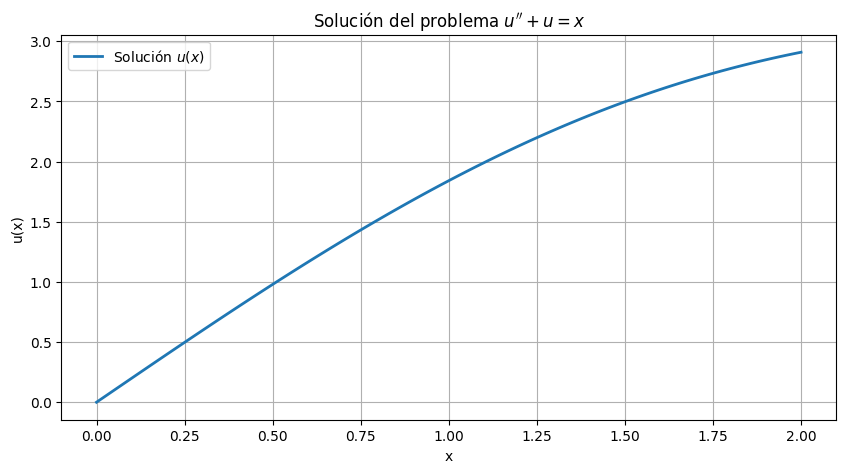

In [79]:
# convertimos a un arreglo numpy

u_expr = sol.rhs


u_num = sp.lambdify(x, u_expr, 'numpy')


xx = np.linspace(0, 2, 100)
yy = u_num(xx)


plt.figure(figsize=(10, 5))
plt.plot(xx, yy, label = "Solución $u(x)$", linewidth=2)
plt.title("Solución del problema $u'' + u = x $")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.legend()
plt.grid()
plt.show()

Ahora se introducen las funciones de prueba

In [80]:
a, b = sp.symbols('a b')

# Función de prueba u_n(x) que cumple u(0)=u'(0)=2
# y cumple ser cúbica

u_n = 2*x + a*x**2 + b*x**3

In [81]:
u_n

a*x**2 + b*x**3 + 2*x

In [82]:
u_n_2 = sp. diff(u_n, x, 2)

F = u_n_2 + u_n


In [83]:
F

a*x**2 + b*x**3 + 2*x + 2*(a + 3*b*x)

In [84]:
# puntos de colocacion

points = [sp.Rational(1,2), sp.Rational(1,1)]

In [85]:
points

[1/2, 1]

In [86]:
eqs = [sp.Eq(F.subs(x, p), p) for p in points]

# Resolver para a y b
sol_1 = sp.solve(eqs, [a, b])

In [87]:
for eq in eqs:
    print(eq)

Eq(9*a/4 + 25*b/8 + 1, 1/2)
Eq(3*a + 7*b + 2, 1)


In [88]:
print("Sistema de ecuaciones simbólico")
for eq in eqs:
    sp.pprint(eq)

Sistema de ecuaciones simbólico
9⋅a   25⋅b          
─── + ──── + 1 = 1/2
 4     8            
3⋅a + 7⋅b + 2 = 1


In [89]:
sol_1

{a: -1/17, b: -2/17}

In [90]:
# sustituir en la funcion de prueba

u_approx = u_n.subs(sol_1)

In [91]:
u_approx

-2*x**3/17 - x**2/17 + 2*x

In [92]:
u_approx_fn = sp.lambdify(x, u_approx, 'numpy')

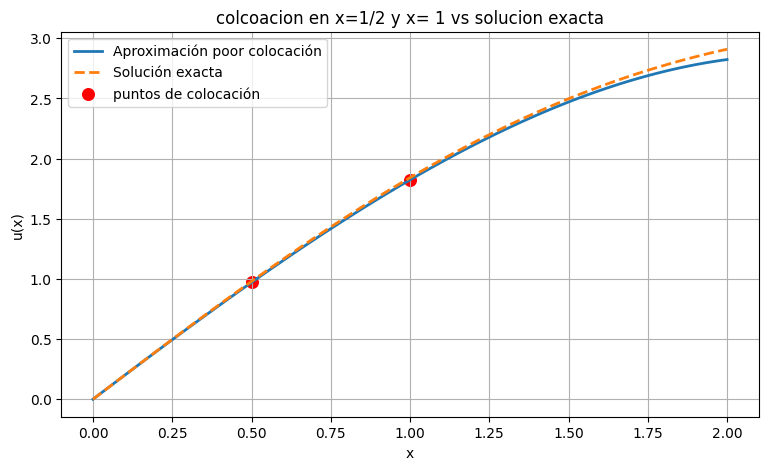

In [93]:
# solución analitica y numérica

xx = np.linspace(0, 2, 100)

plt.figure(figsize=(9,5))
plt.plot(xx, u_approx_fn(xx), label = 'Aproximación poor colocación', linewidth=2)
plt.plot(xx, yy, "--", label = "Solución exacta", linewidth=2)

# puntos de colocacion
plt.scatter([0.5, 1.0], u_approx_fn(np.array([0.5, 1.0])),
            color = "red", s=70, label = "puntos de colocación")

plt.title("colcoacion en x=1/2 y x= 1 vs solucion exacta")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.legend()
plt.grid()
plt.show()

Ahora haremos el cáclculo el error máximo

In [113]:

# Solución exacta
u_exact = x + sp.sin(x)

# Solución aproximada por colocación
u_approx = 2*x - (1/17)*x**2 - (2/17)*x**3

# Convertir a funciones numéricas
u_exact_fn = sp.lambdify(x, u_exact, 'numpy')
u_approx_fn = sp.lambdify(x, u_approx, 'numpy')


In [114]:
xx = np.linspace(0, 1, 200)

yy_exact = u_exact_fn(xx)
yy_approx = u_approx_fn(xx)


In [115]:
error_abs = np.abs(yy_exact - yy_approx)


In [116]:
error_max = np.max(error_abs)
print("Error máximo:", error_max)


Error máximo: 0.017941573043190218
